In [17]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
import math

In [18]:
# Step 1: Define State
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    equation: str
    discriminant: float
    result: str

In [19]:
# Step 2: Functions (Nodes)
def show_equation(state: QuadState):
    eq = f"{state['a']}x² + {state['b']}x + {state['c']}"
    return {"equation": eq}

def calculate_discriminant(state: QuadState):
    d = (state["b"] ** 2) - (4 * state["a"] * state["c"])
    return {"discriminant": d}

def real_roots(state: QuadState):
    d = math.sqrt(state["discriminant"])
    r1 = (-state["b"] + d) / (2 * state["a"])
    r2 = (-state["b"] - d) / (2 * state["a"])
    return {"result": f"The roots are {r1:.2f} and {r2:.2f}"}

def repeated_root(state: QuadState):
    r = -state["b"] / (2 * state["a"])
    return {"result": f"The repeated root is {r:.2f}"}

def no_real_roots(state: QuadState):
    return {"result": "No real roots"}

In [20]:
# Step 3: Routing Function (Conditional)
def check_condition(state: QuadState) ->  Literal["RealRoots", "RepeatedRoot", "NoRealRoots"]:
    if state["discriminant"] > 0:
        return "RealRoots"
    elif state["discriminant"] == 0:
        return "RepeatedRoot"
    else:
        return "NoRealRoots"

In [21]:
# Step 4: Build Graph
graph = StateGraph(QuadState)
graph.add_node("ShowEquation", show_equation)
graph.add_node("CalculateDiscriminant", calculate_discriminant)
graph.add_node("RealRoots", real_roots)
graph.add_node("RepeatedRoot", repeated_root)
graph.add_node("NoRealRoots", no_real_roots)

In [22]:
# Edges
graph.add_edge(START, "ShowEquation")
graph.add_edge("ShowEquation", "CalculateDiscriminant")
graph.add_conditional_edges("CalculateDiscriminant", check_condition)
graph.add_edge("RealRoots", END)
graph.add_edge("RepeatedRoot", END)
graph.add_edge("NoRealRoots", END)


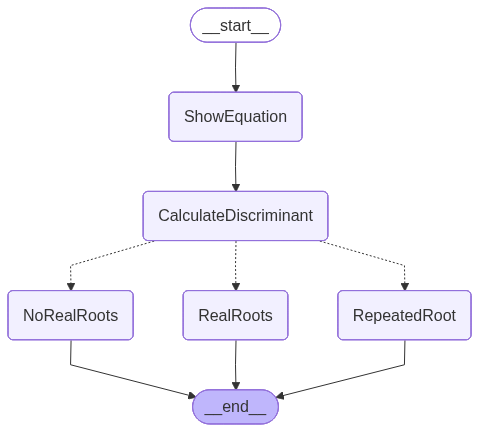

In [23]:
# Step 5: Compile & Run
workflow = graph.compile()
workflow


In [25]:
initial_state = {"a": 1, "b": -3, "c": 2}
result = workflow.invoke(initial_state)
print("Equation:", result["equation"])
print("Discriminant:", result["discriminant"])
print("Result:", result["result"])

Equation: 1x² + -3x + 2
Discriminant: 1
Result: The roots are 2.00 and 1.00
